In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


Class distribution (0: malignant, 1: benign):
1    0.627417
0    0.372583
Name: proportion, dtype: float64


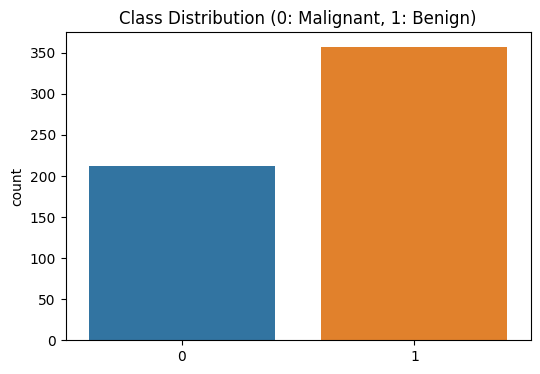

In [4]:
print("\nClass distribution (0: malignant, 1: benign):")
print(y.value_counts(normalize=True))
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Class Distribution (0: Malignant, 1: Benign)")
plt.show()

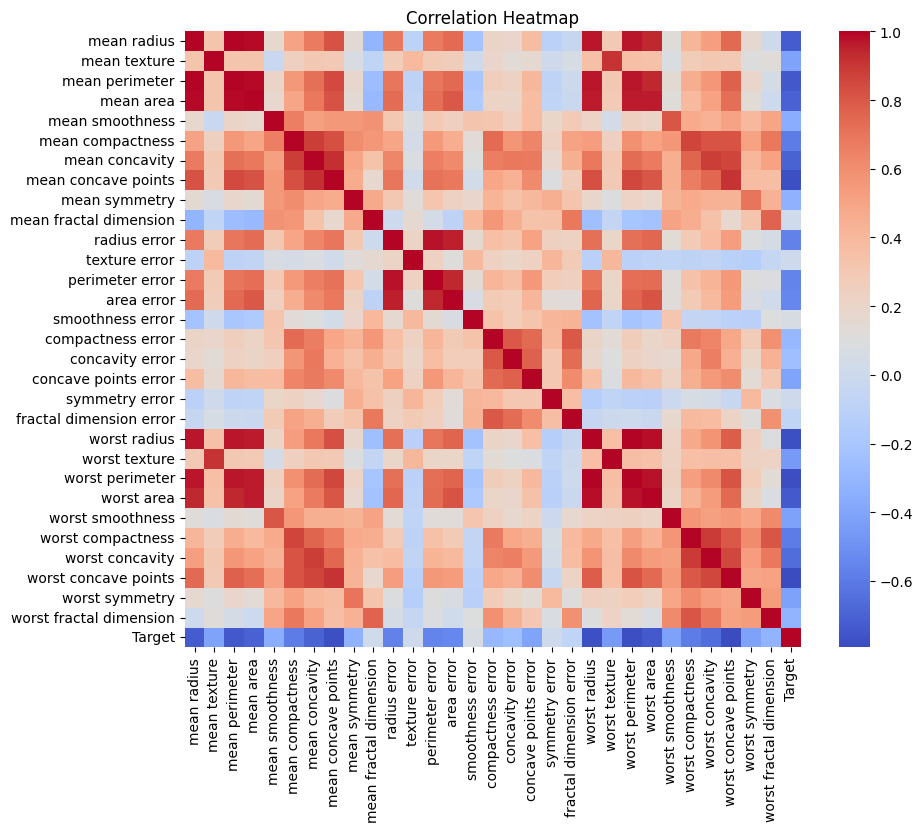

In [6]:
data_temp = X.copy()
data_temp['Target'] = y
corr_matrix = data_temp.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of testing samples: {X_test.shape[0]}")

Number of training samples: 455
Number of testing samples: 114


In [8]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)
print(f"coeficiente {model_lr.coef_}")
print(f"intercept {model_lr.intercept_}")

coeficiente [[ 1.23157834  0.53848702  0.15188967 -0.01284493 -0.04665119 -0.22361233
  -0.30905409 -0.13208595 -0.06961726 -0.01408004  0.04236195  0.52538636
   0.04555045 -0.11046661 -0.00434806 -0.04600259 -0.06340172 -0.01700659
  -0.01640183 -0.00403538  1.29606401 -0.59959605 -0.19885879 -0.01764939
  -0.08314884 -0.67608902 -0.83576514 -0.24452558 -0.22447825 -0.06272533]]
intercept [0.23362193]


In [9]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_auc_score, roc_curve)
y_pred_lr = model_lr.predict(X_test)
print("Logistic Regression Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1]):.2f}")

Logistic Regression Evaluation Metrics:
Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1 Score: 0.97
ROC AUC: 1.00


In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# Section 1: Reduce Dimensionality with PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [11]:
model_lr_pca = LogisticRegression().fit(X_train_pca, y_train)

In [12]:
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model_lr_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

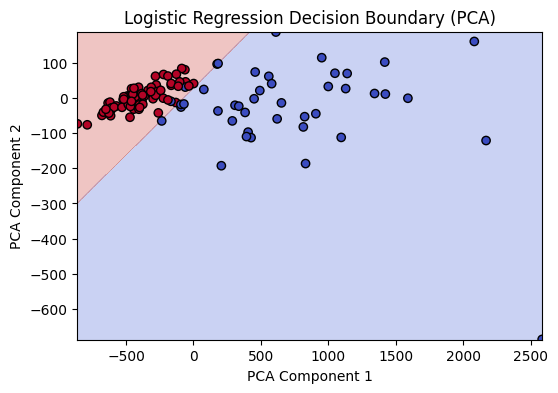

In [13]:
plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.title("Logistic Regression Decision Boundary (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

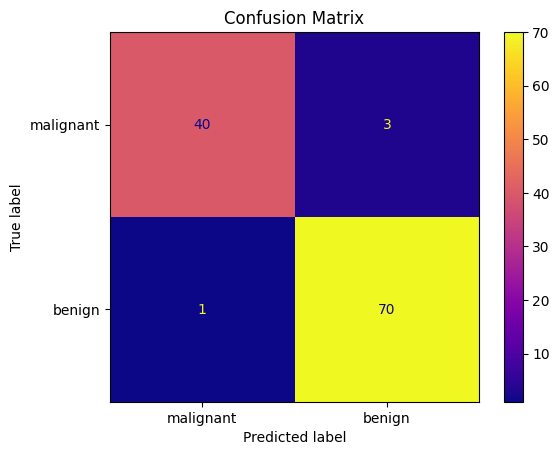

In [14]:
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.plasma)
plt.title("Confusion Matrix")
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred_lr = model_knn.predict(X_test)
print("Logistic Regression Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1]):.2f}")

Logistic Regression Evaluation Metrics:
Accuracy: 0.96
Precision: 0.93
Recall: 1.00
F1 Score: 0.97
ROC AUC: 1.00


In [17]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [18]:
model_knn_pca = KNeighborsClassifier(n_neighbors=5).fit(X_train_pca, y_train)

In [ ]:
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model_knn_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

In [ ]:
plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.title("KNN Decision Boundary (PCA, K=5)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.plasma)
plt.title("Confusion Matrix")
plt.show()

In [20]:
for k in [1, 5, 10]:
    model_knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)
    print(f"KNN (K={k}) Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}, F1: {f1_score(y_test, y_pred_knn):.2f}")

KNN (K=1) Metrics:
Accuracy: 0.93, F1: 0.95
KNN (K=5) Metrics:
Accuracy: 0.96, F1: 0.97
KNN (K=10) Metrics:
Accuracy: 0.97, F1: 0.98


In [21]:
from sklearn.svm import SVC
for kernel in ['linear', 'rbf']:
    model_svm = SVC(kernel=kernel, probability=True, random_state=42)
    model_svm.fit(X_train, y_train)
    print(f"\nSVM ({kernel}) Support Vectors:", len(model_svm.support_vectors_))


SVM (linear) Support Vectors: 51

SVM (rbf) Support Vectors: 131



SVM (linear) Metrics:
Accuracy: 0.96
Precision: 0.95
Recall: 0.99
F1 Score: 0.97
ROC AUC: 1.00


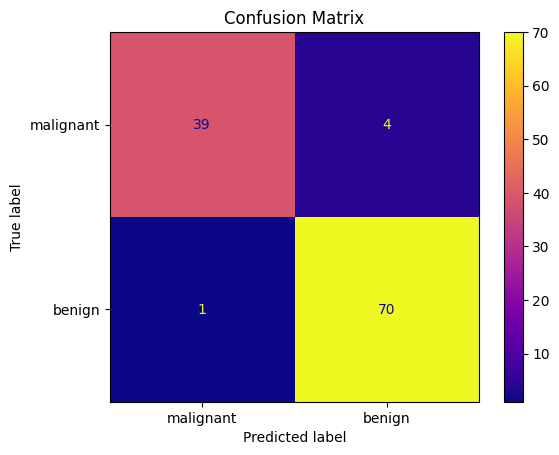


SVM (rbf) Metrics:
Accuracy: 0.95
Precision: 0.92
Recall: 1.00
F1 Score: 0.96
ROC AUC: 0.99


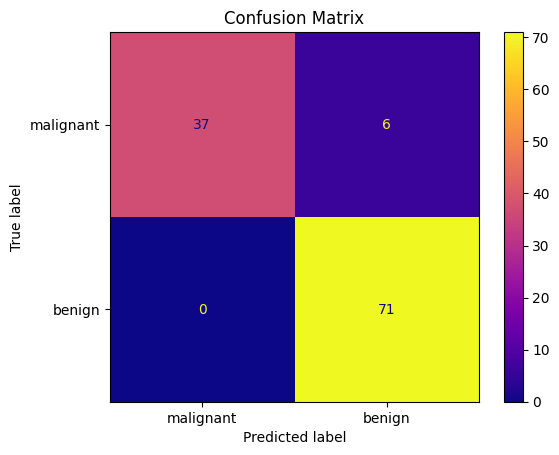

In [22]:
for kernel in ['linear', 'rbf']:
    model_svm = SVC(kernel=kernel, probability=True, random_state=42).fit(X_train, y_train)
    y_pred_svm = model_svm.predict(X_test)
    print(f"\nSVM ({kernel}) Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred_svm):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred_svm):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred_svm):.2f}")
    print(f"ROC AUC: {roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1]):.2f}")

    cm = confusion_matrix(y_test, y_pred_svm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
    disp.plot(cmap=plt.cm.plasma)
    plt.title("Confusion Matrix")
    plt.show()

In [23]:
for C in [0.1, 1, 10]:
    model_svm = SVC(kernel='rbf', C=C, probability=True, random_state=42).fit(X_train, y_train)
    y_pred_svm = model_svm.predict(X_test)
    print(f"SVM (RBF, C={C}) Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}, F1: {f1_score(y_test, y_pred_svm):.2f}")

SVM (RBF, C=0.1) Metrics:
Accuracy: 0.94, F1: 0.95
SVM (RBF, C=1) Metrics:
Accuracy: 0.95, F1: 0.96
SVM (RBF, C=10) Metrics:
Accuracy: 0.95, F1: 0.96


In [24]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
print("\nTree Depth:", model_dt.get_depth())
print("Feature Importance:", pd.Series(model_dt.feature_importances_, index=X.columns))


Tree Depth: 7
Feature Importance: mean radius                0.000000
mean texture               0.058478
mean perimeter             0.000000
mean area                  0.000000
mean smoothness            0.000000
mean compactness           0.000000
mean concavity             0.000000
mean concave points        0.691420
mean symmetry              0.000000
mean fractal dimension     0.000000
radius error               0.000000
texture error              0.000000
perimeter error            0.000000
area error                 0.011983
smoothness error           0.001237
compactness error          0.000000
concavity error            0.006276
concave points error       0.015931
symmetry error             0.000000
fractal dimension error    0.018554
worst radius               0.052299
worst texture              0.017445
worst perimeter            0.051494
worst area                 0.000000
worst smoothness           0.009233
worst compactness          0.000000
worst concavity            0.

In [25]:
y_pred_dt = model_dt.predict(X_test)
print("\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, model_dt.predict_proba(X_test)[:, 1]):.2f}")


Decision Tree Metrics:
Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
ROC AUC: 0.94


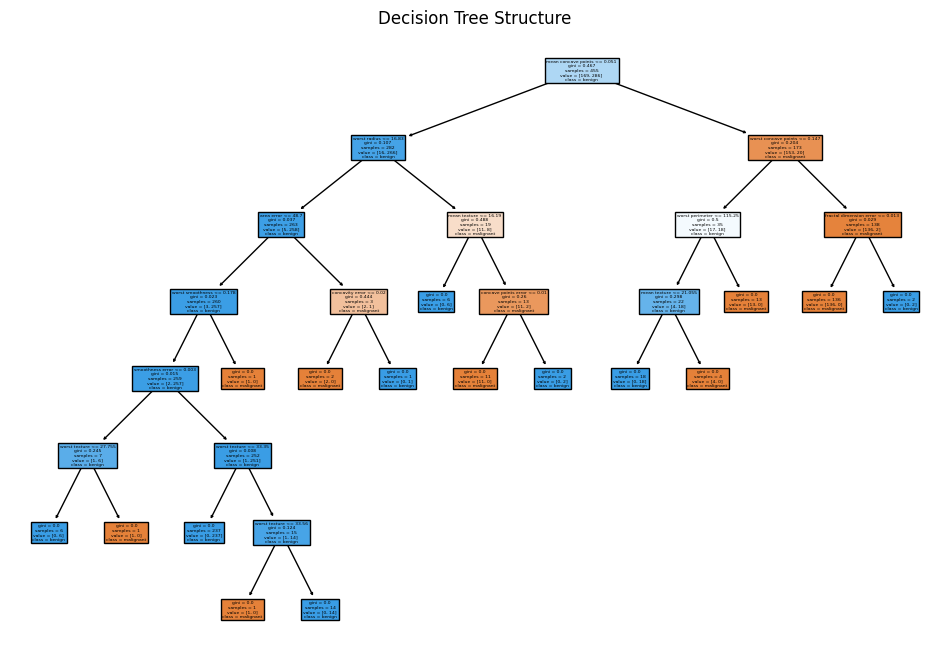

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(model_dt, feature_names=X.columns,
          class_names=['malignant', 'benign'],
          filled=True)
plt.title("Decision Tree Structure")
plt.show()

In [27]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [28]:
model_dt_pca = DecisionTreeClassifier(random_state=42).fit(X_train_pca, y_train)

In [31]:
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model_dt_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

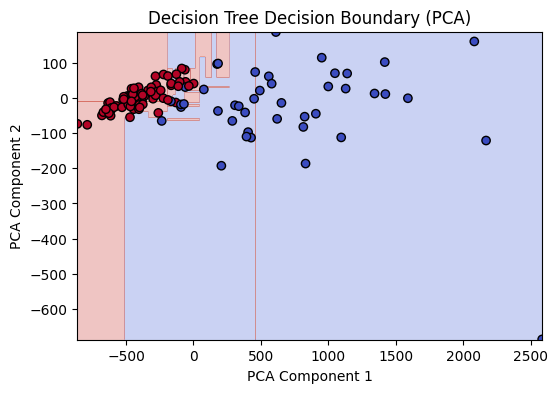

In [32]:
plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.title("Decision Tree Decision Boundary (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [33]:
for depth in [1, 3, 10]:
    model_dt = DecisionTreeClassifier(max_depth=depth, random_state=42).fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    print(f"Decision Tree (max_depth={depth}) Metrics:")
    print(f"Accuracy:{accuracy_score(y_test, y_pred_dt):.2f}, F1: {f1_score(y_test, y_pred_dt):.2f}")

Decision Tree (max_depth=1) Metrics:
Accuracy:0.89, F1: 0.91
Decision Tree (max_depth=3) Metrics:
Accuracy:0.95, F1: 0.96
Decision Tree (max_depth=10) Metrics:
Accuracy:0.95, F1: 0.96


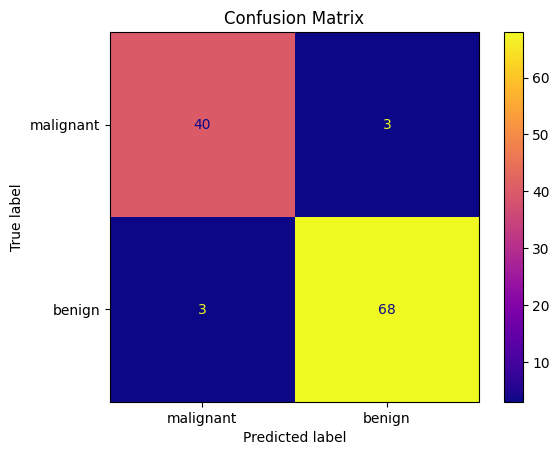

In [34]:
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.plasma)
plt.title("Confusion Matrix")
plt.show()

The best model for this task is a Support Vector Machine (SVM) with a linear kernel. It is accurate, reliable, and not prone to overfitting. The weakest model, the Decision Tree, could be improved by limiting its depth or using a more advanced version like a Random Forest, which combines multiple trees to reduce overfitting and improve performance.